## Plot rapid-mCDR results
- Plot the results of the rapid-mCDR simulation for Ocean Alkalinity Enhancement (OAE, see function `run_rapid_mcdr_transect.ipynb`)
- We provide the results of 3 simulations, OAE deployed in the discrete points across Pacific transect (PLEASE DO NOT RERUN THESE SIMULATIONS YOURSELF)

      1. OAE deployed from January 1 1995 -- December 31 1995 ... results are saved in file `rapid_mcdr_results.ipynb`
      2. OAE deployed from January 1 1995 -- January 31 1995 ...  results are saved in file `rapid_mcdr_results_jan.ipynb`
      3. OAE deployed from July 1 1995 -- July 31 1995 ...  results are saved in file `rapid_mcdr_results_jul.ipynb`
   
 - replace `dir_to_save_figs` with your local directory where the figures should be saved 

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import palettable
import cmocean
import matplotlib
import cartopy as cart
import cartopy.crs as crs
from mpl_toolkits.basemap import Basemap

#
# general setting for plotting
#

colors=palettable.colorbrewer.qualitative.Paired_12.mpl_colors
#https://jiffyclub.github.io/palettable/colorbrewer/qualitative/
color=[colors[1],colors[5]]
colormap=cmocean.cm.thermal_r
colormap_diff=cmocean.cm.balance
colors_p=palettable.colorbrewer.qualitative.Set1_9.mpl_colors

line_width=5
font_size_label='large'
matplotlib.rcParams.update({'font.size':28})
custom_labels_z = ['0', '0.5', '1','1.5','2']
y_ticks_z=[0,-500,-1000,-1500,-2000]
xlim_lon=[-77,55]
ylim_z=[-2000,0]

/home/jovyan/shared/NASA_Summer_School_2024/marine_co2/materials


In [2]:
# paths to rapid-mCDR ouputs ... where we read the data from
path_out='/home/jovyan/shared/NASA_Summer_School_2024/marine_co2/materials/data/rapid_mcdr_outputs/'
#  path to the directory where we will save plots
# REPLACE WITH YOUR LOCAL PATH
dir_to_save_figs= '/home/jovyan/shared/NASA_Summer_School_2024/marine_co2/materials/plots/'

## Read all the rapid-mCDR results.

In [3]:
# baseline simulation (deployment over year 1995)
results= xr.open_dataset(path_out+'rapid_mcdr_results.nc')
# deployment january 1995
results_jan= xr.open_dataset(path_out+'rapid_mcdr_results_jan.nc')
# deployment july 1995
results_jul= xr.open_dataset(path_out+'rapid_mcdr_results_july.nc')

In [4]:
# sometimes efficiency values are slightly >1, set them to 1
results['efficiency'] = results.efficiency.where(results.efficiency <= 1, 1)
#results_nodiff['efficiency'] = results_nodiff.efficiency.where(results_nodiff.efficiency <= 1, 1)
#results_now['efficiency'] = results_now.efficiency.where(results_now.efficiency <= 1, 1)
results_jan['efficiency'] = results_jan.efficiency.where(results_jan.efficiency <= 1, 1)
results_jul['efficiency'] = results_jul.efficiency.where(results_jul.efficiency <= 1, 1)

### Plot location of OAE deployments 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


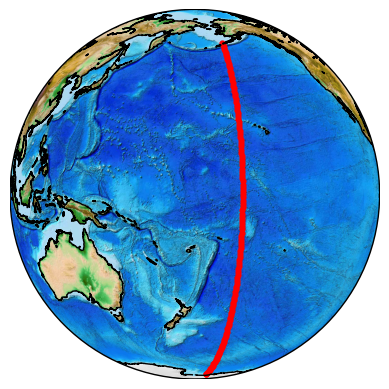

In [5]:
projection=crs.Orthographic(central_longitude=-140)
m = Basemap(projection='ortho',lon_0=-180,lat_0=0,
            resolution='l')
m.drawcoastlines()

m.etopo()

lon=[-140]
lat=[0]

xpt,ypt = m(results.lon.values[:,0], results.lat.values[:,0])
m.scatter(xpt,ypt,s=12,c='r')
plt.savefig(dir_to_save_figs+'rapid_mcdr_simulation_locations.png',bbox_inches='tight')

## Plot baseline simulation 
- max mCDR efficiency (this will be at the end of simulation) ... solid black line
- profile of time-averaged vertical velocity ... blue-red color
- profile of time-averaged diffusivity ... white to grey lined 

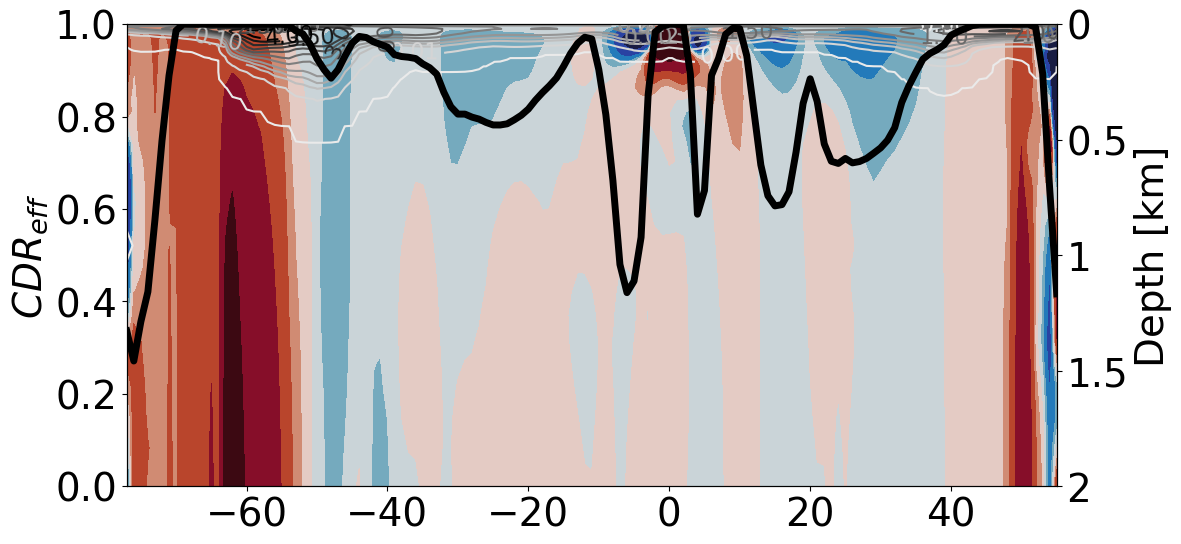

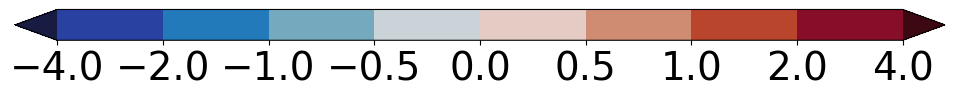

In [6]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax2 = ax.twinx()

xx=results.efficiency.max('time').plot(x='lat_sim',label='Yr1995',color='k',linewidth=line_width,ax=ax)

pp0=(100*results.k_diff).mean('time').plot.contour(x='lat_sim',y='Zl',ax=ax2,cmap='gray_r',levels=[0,0.001,0.01,0.1,0.25,0.5,1,1.5,2,2.5,3,3.5,4],zorder=2,add_labels=True)
pp1=(results.w*1e6).mean('time').plot.contourf(x='lat_sim',y='Zl',ax=ax2,cmap=colormap_diff,levels=[-4,-2,-1,-0.5,0,0.5,1,2,4],add_colorbar=False,add_labels=True,zorder=1)
ax.clabel(pp0, inline=True, fontsize=16, fmt='%1.2f')
plt.xlim(xlim_lon)
plt.ylim(ylim_z)
ax2.set_xlabel('')
ax2.set_ylabel('Depth [km]')

ax.set_zorder(ax2.get_zorder()+1)
ax.patch.set_visible(False)

ax.set_ylabel('$CDR_{eff}$')
ax.set_ylim([0,1])
ax.set_xlabel('')

ax2.set_yticks(y_ticks_z)  # Set the positions of y-ticks
ax2.set_yticklabels(custom_labels_z)
plt.savefig(dir_to_save_figs+'rapid_mcdr_profile_YR1995.png',bbox_inches="tight")

fig, axs = plt.subplots(ncols=1,figsize=(12,0.4))
plt.colorbar(pp1,axs,orientation='horizontal')
plt.savefig(dir_to_save_figs+'rapid_mcdr_profile_w_cbar_new.png',bbox_inches="tight")

## Plot  Baseline simulation 
- mCDR efficiency ... black line
- Alk perturbation at the end of simulation ... yellow to black colormap

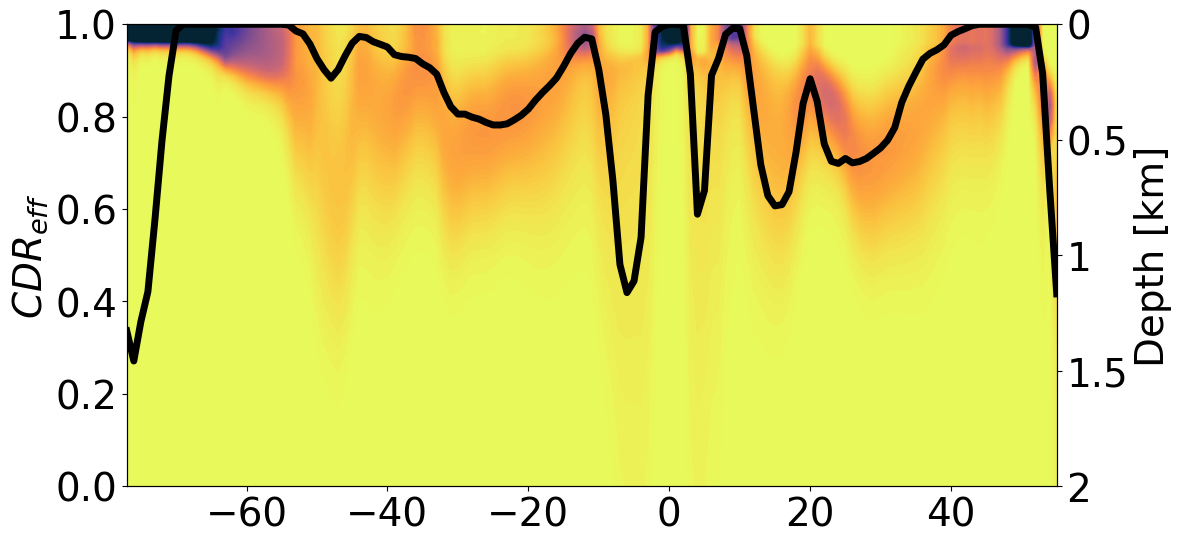

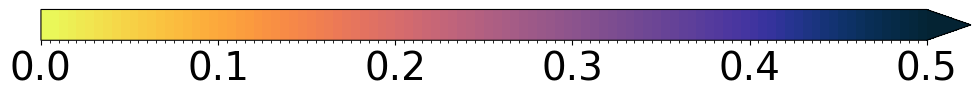

In [7]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax2 = ax.twinx()

xx=results.efficiency.max('time').plot(x='lat_sim',label='Yr1995',color='k',linewidth=line_width,ax=ax)

dta=results.alk.isel(time=-1)
dta=dta/dta.max()
dta['z']=-dta.z

pp1=dta.plot.contourf(x='lat_sim',y='z',ax=ax2,cmap=colormap,levels=np.arange(0,0.501,0.005),add_colorbar=False,add_labels=True)
plt.xlim(xlim_lon)
plt.ylim(ylim_z)
ax2.set_xlabel('')
ax2.set_ylabel('Depth [km]')

ax.set_zorder(ax2.get_zorder()+1)
ax.patch.set_visible(False)

ax.set_ylabel('$CDR_{eff}$')
ax.set_ylim([0,1])
ax.set_xlabel('')
ax2.set_title('')

ax2.set_yticks(y_ticks_z)  # Set the positions of y-ticks
ax2.set_yticklabels(custom_labels_z)
plt.savefig(dir_to_save_figs+'rapid_mcdr_profile1_YR1995.png',bbox_inches="tight")

fig, axs = plt.subplots(ncols=1,figsize=(12,0.4))
colorbar=plt.colorbar(pp1,axs,orientation='horizontal')
colorbar.set_ticks([0, 0.1,0.2,0.3,0.4,0.5])
plt.savefig(dir_to_save_figs+'rapid_mcdr_profile_dic_cbar_new.png',bbox_inches="tight")

## Compare efficiency from baseline, july and january deployments

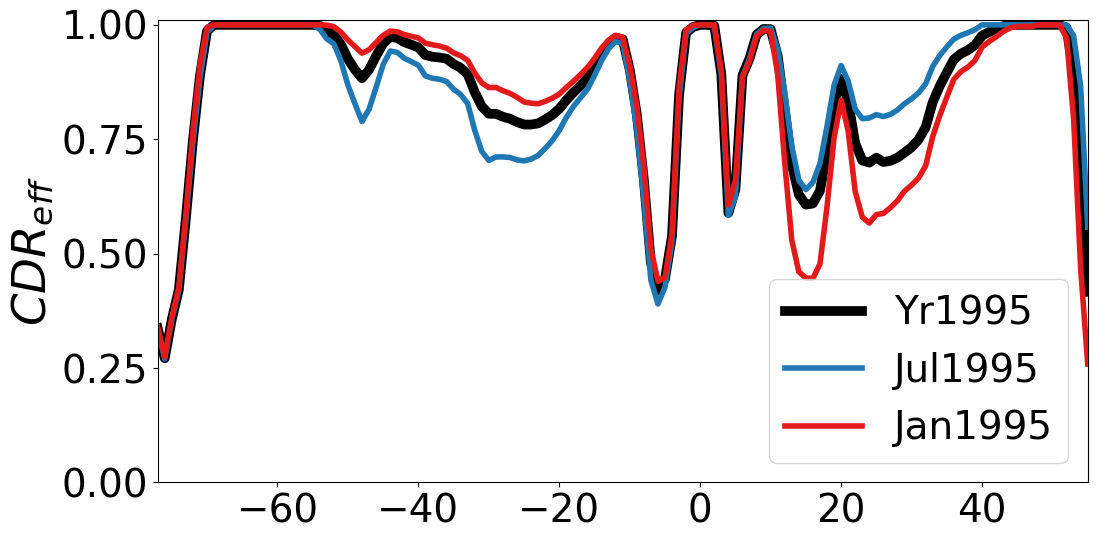

In [8]:
fig,ax = plt.subplots(1,1,figsize=(12,6))

results.efficiency.max('time').plot(x='lat_sim',label='Yr1995',color='k',linewidth=line_width+2,ax=ax) #,marker='o',markersize=10)
results_jul.efficiency.max('time').plot(x='lat_sim',label='Jul1995',color=color[0],linewidth=line_width-1,ax=ax)
results_jan.efficiency.max('time').plot(x='lat_sim',label='Jan1995',color=color[1],linewidth=line_width-1,ax=ax)

ax.set_xlabel('Latitude [$^{\circ}N$]',fontsize=font_size_label)
ax.set_ylabel('$CDR_{eff}$',fontsize=font_size_label)
ax.set_title('')    
ax.set_xlabel('') #,fontsize=font_size_label)
plt.legend()
plt.xlim(xlim_lon)
plt.ylim([0.2,1.01])
plt.yticks([0,0.25,0.5,0.75,1])
plt.savefig(dir_to_save_figs+'rapid_mcdr_profile_eff_seasons.png',bbox_inches="tight")

## Plot CDR potential and sea-ice cover

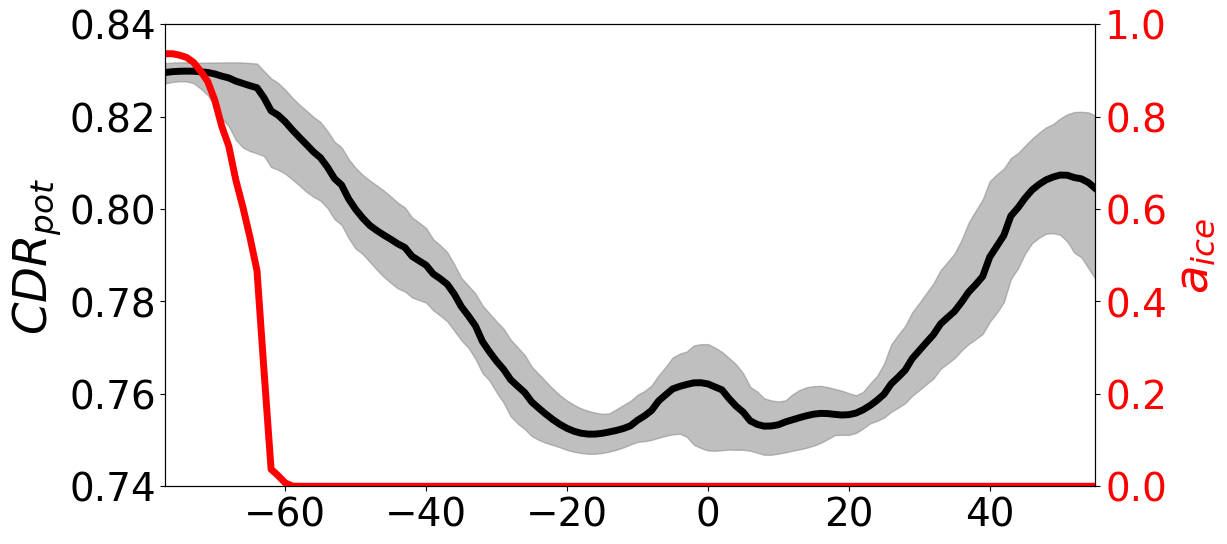

In [9]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax2 = ax.twinx()

results.potential.mean('time').plot(x='lat_sim',label='potential',color='k',linewidth=line_width,ax=ax)

x=results.lat_sim.values
y1=results.potential.min('time')
y2=results.potential.max('time')

ax.fill_between(x, y1, y2, color='gray', alpha=0.5, label='Shaded Area')

results.siarea.mean('time').plot(x='lat_sim',linewidth=line_width,ax=ax2,linestyle='-',color='r')

ax.set_xlabel('')
ax.set_ylabel('$CDR_{pot}$',fontsize=font_size_label)
ax2.set_ylabel('$a_{ice}$',fontsize=font_size_label,color='r')
ax.set_title('')    
plt.xlim(xlim_lon)
ax.set_ylim([0.74,0.84])
ax2.set_ylim([0,1])
plt.yticks(color='red')
plt.savefig(dir_to_save_figs+'rapid_mcdr_profile_cdrpot.png',bbox_inches="tight")